<a href="https://colab.research.google.com/github/renatagomezc/Regresion-Lineal/blob/main/Girona_Actividad_6_2_(Regresi%C3%B3n_Lineal_M%C3%BAltiple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 6.2 (Regresión Lineal Múltiple) Girona**

*Integrantes*
- Paola Plascencia Rey
- Nicole Aryam Rodriguez 
- Renata Pilar Gómez Castillo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Girona_limpio.csv',index_col=0)
df.head()

<ipython-input-2-c5753a4628e4>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('Girona_limpio.csv',index_col=0)


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,14551.0,20230300000000.0,57237,1.0,5.0,0.0,41.9965,2.83646,2.0,0.0,...,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",$42.00,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,1205757.0,20230300000000.0,6586355,1.0,1.0,0.0,41.79304,2.77412,2.0,0.0,...,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",$47.00,t,31/03/2023,01/08/2013,26/06/2022,--,f
2,1212820.0,20230300000000.0,6620645,2.0,3.0,0.0,42.11284,3.1667,4.0,0.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",$74.00,t,01/04/2023,10/06/2013,30/12/2022,--,f
3,751638.0,20230300000000.0,3680160,6.0,6.0,0.0,42.36958,2.9803,2.0,0.0,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",$45.00,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
4,41342.0,20230300000000.0,180072,2.0,3.0,0.0,42.34655,3.20463,4.0,0.0,...,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",$120.00,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f


**Valores Nulos y outliers**

In [3]:
df.isnull().sum().sum()

75

In [4]:
Y = df.select_dtypes(include=[np.float, np.int])
x = df.select_dtypes(include=[np.object])

<ipython-input-4-8b94f98b8969>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = df.select_dtypes(include=[np.float, np.int])
<ipython-input-4-8b94f98b8969>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = df.select

In [5]:
Y = Y.fillna(0)
x=x.fillna('--')

In [6]:
df=pd.merge(Y,x, left_index=True, right_index=True)

In [7]:
df.isnull().sum().sum()

0

Estamos usando data ya procesada, por lo que los valores nulos y outliers ya fueron tratados

##**Entire home/Apt**

In [8]:
entire=df[df['room_type']=='Entire home/apt']

In [9]:
y_e = []
x1_e=[]
x2_e = []
x3_e = []
x4_e = []
deter_e=[]
corr_e=[]

###**host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating**

In [10]:
data = entire

In [11]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)


<ipython-input-11-1c2dc9575a21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-11-1c2dc9575a21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-11-1c2dc9575a21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [12]:
y = data[['host_acceptance_rate']]
x1 = data[['host_response_rate']]
x2 = data[['price']]
x3 = data[['number_of_reviews']]
x4 = data[['review_scores_rating']]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

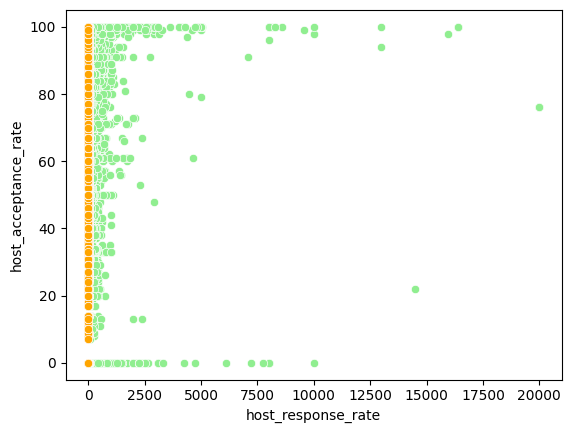

In [13]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [14]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [15]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [16]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [17]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [18]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[ 4.85498769e-01, -3.11235176e-04,  5.16666864e-03,
          1.25823443e+00]]),
 'rank_': 4,
 'singular_': array([73525.11527376,  4238.90650658,  1059.6977646 ,   250.8377945 ]),
 'intercept_': array([39.02605196])}

####**Modelo matemático**

Modelo matemático: y= 4.85498769e-01x1 + -3.11235176e-04x2 +  5.16666864e-03x3 + 1.25823443e+00x4 + 39.02605196

In [19]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[93.16462304],
       [44.5314392 ],
       [93.59420206],
       ...,
       [59.88195753],
       [84.14382412],
       [59.87977888]])

In [20]:
#Insertamos la columna de predicciones en el DataFrame

data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-20-0fbb012ffc02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,Predicciones
2,100.0,74.0,0.0,4.46,80.0,93.164623
4,0.0,120.0,11.0,4.36,0.0,44.531439
5,100.0,105.0,29.0,4.69,100.0,93.594202
6,100.0,110.0,15.0,4.36,100.0,93.105095
7,0.0,60.0,10.0,4.11,0.0,44.230388
...,...,...,...,...,...,...
19650,93.0,209.0,0.0,0.00,100.0,84.112389
19651,100.0,52.0,0.0,0.00,100.0,87.559745
19652,43.0,66.0,0.0,0.00,50.0,59.881958
19653,93.0,108.0,0.0,0.00,99.0,84.143824


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

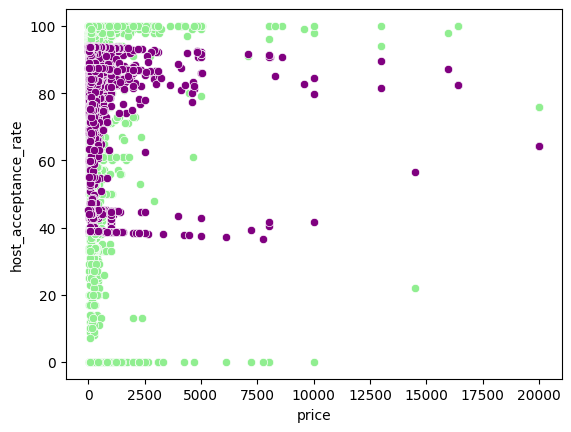

In [21]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [22]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [23]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.3050869046734188

In [24]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.5523467250499624

###**Price vs availability_365, host_response_rate, number_of_reviews, accommodates**

In [25]:
data = entire

In [26]:
data['accommodates'] = data['accommodates'].astype(float)

<ipython-input-26-0c4d7e569382>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['accommodates'] = data['accommodates'].astype(float)


In [27]:
y = data[['price']]
x1 = data[['availability_365']]
x2 = data[['host_response_rate']]
x3 = data[['number_of_reviews']]
x4 = data[['accommodates']]

<Axes: xlabel='availability_365', ylabel='price'>

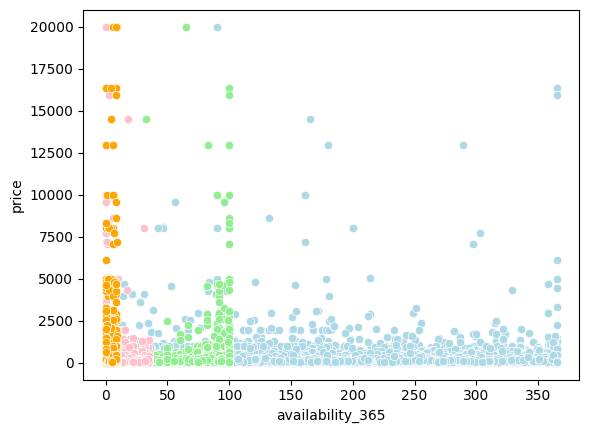

In [28]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [29]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [30]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [31]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [32]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [33]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[ -0.23202823,  -0.51455744,  -3.34619503, -10.64456844]]),
 'rank_': 4,
 'singular_': array([15136.49989409,  4237.55073115,  1053.76107273,   292.21864001]),
 'intercept_': array([381.72904233])}

####**Modelo matemático**

Modelo matemático: y=  -0.23202823x1 +  -0.51455744x2 +  -3.34619503x3 + -10.64456844x4 + 381.72904233

In [34]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[214.60613183],
       [302.3426232 ],
       [126.15152046],
       ...,
       [254.60920445],
       [227.95321962],
       [285.03363297]])

In [35]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-35-9a0fc1fe72ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,availability_365,host_response_rate,number_of_reviews,accommodates,price,Predicciones
2,315.0,100.0,0.0,4.0,74.0,214.606132
4,0.0,0.0,11.0,4.0,120.0,302.342623
5,278.0,100.0,29.0,4.0,105.0,126.151520
6,336.0,100.0,15.0,4.0,110.0,159.540613
7,56.0,0.0,10.0,7.0,60.0,260.761532
...,...,...,...,...,...,...
19650,107.0,93.0,0.0,8.0,209.0,223.891632
19651,186.0,100.0,0.0,4.0,52.0,244.537774
19652,269.0,43.0,0.0,4.0,66.0,254.609204
19653,273.0,93.0,0.0,4.0,108.0,227.953220


<Axes: xlabel='host_response_rate', ylabel='price'>

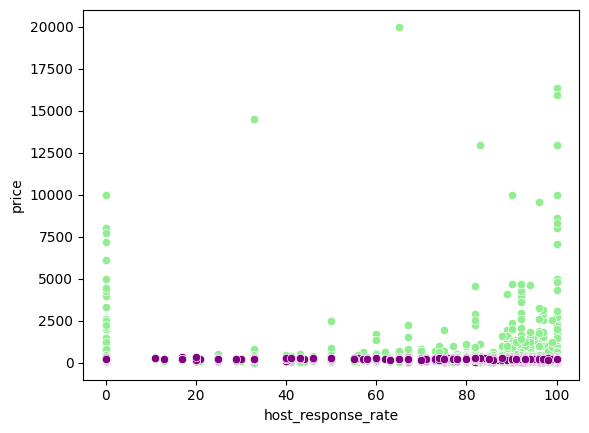

In [36]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [37]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [38]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.007380667374441541

In [39]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.0859108105795862

###**host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication**

In [40]:
data = entire

In [41]:
y = data[['host_acceptance_rate']]
x1 = data[['number_of_reviews']]
x2 = data[['review_scores_cleanliness']]
x3 = data[['review_scores_communication']]
x4 = '--'

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

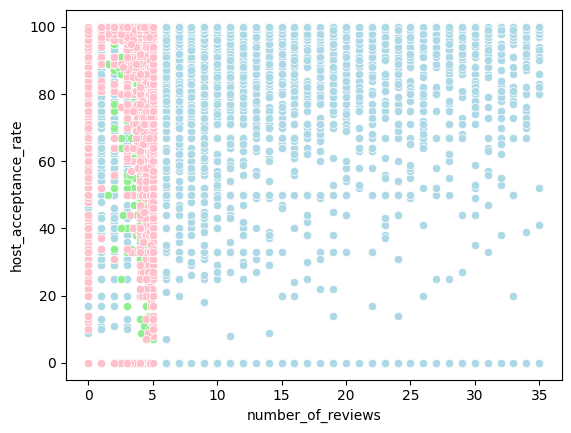

In [42]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)

In [43]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0]]]
Var_Dep= y

In [44]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [45]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [46]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [47]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([[0.02350453, 0.5901304 , 1.28599248]]),
 'rank_': 3,
 'singular_': array([1070.25566176,  356.52765349,   43.7082791 ]),
 'intercept_': array([78.16898599])}

####**Modelo matemático**

Modelo matemático: y=  0.02350453x1 + 0.5901304x2 + 1.28599248x3 + 78.16898599

In [48]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0]]])
y_pred

array([[86.83377223],
       [87.35470875],
       [87.34099539],
       ...,
       [78.16898599],
       [78.16898599],
       [78.16898599]])

In [49]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],y.columns[0],'Predicciones']]


<ipython-input-49-d9a4cba03580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,review_scores_cleanliness,review_scores_communication,host_acceptance_rate,Predicciones
2,0.0,4.31,4.76,80.0,86.833772
4,11.0,4.82,4.73,0.0,87.354709
5,29.0,4.69,4.45,100.0,87.340995
6,15.0,4.79,4.50,100.0,87.135245
7,10.0,4.78,5.00,0.0,87.654817
...,...,...,...,...,...
19650,0.0,0.00,0.00,100.0,78.168986
19651,0.0,0.00,0.00,100.0,78.168986
19652,0.0,0.00,0.00,50.0,78.168986
19653,0.0,0.00,0.00,99.0,78.168986


<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

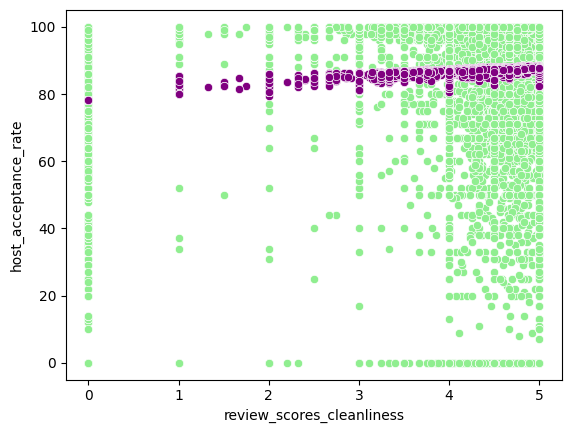

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [51]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4)

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.019998038760028036

In [53]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.1414144220368914

##**Private room**

In [54]:
private=df[df['property_type']=='Private room']

###**host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating**

In [55]:
data = private

In [56]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)


<ipython-input-56-1c2dc9575a21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-56-1c2dc9575a21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-56-1c2dc9575a21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [57]:
y = data[['host_acceptance_rate']]
x1 = data[['host_response_rate']]
x2 = data[['price']]
x3 = data[['number_of_reviews']]
x4 = data[['review_scores_rating']]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

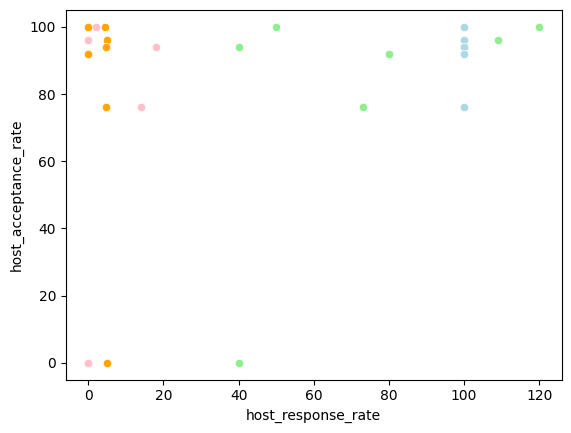

In [58]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [59]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [60]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [61]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [62]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [63]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[-0.08013087,  0.72030443,  2.63400833, -3.87048466]]),
 'rank_': 4,
 'singular_': array([131.15458523,  60.2210537 ,   9.73921654,   3.82216987]),
 'intercept_': array([33.0468081])}

####**Modelo matemático**

Modelo matemático: y= -0.08013087x1 +  0.72030443x2 +  2.63400833x3 + -3.87048466x4 + 33.0468081

In [64]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[ 84.50411917],
       [ 43.0871347 ],
       [ 96.61042177],
       [ 82.75713137],
       [ 56.9128653 ],
       [111.47025245],
       [ 82.65807524]])

In [65]:
#Insertamos la columna de predicciones en el DataFrame

data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-65-0fbb012ffc02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,Predicciones
356,100.0,109.0,0.0,4.92,96.0,84.504119
2484,0.0,40.0,0.0,4.85,0.0,43.087135
3134,100.0,73.0,14.0,4.62,76.0,96.610422
7838,100.0,40.0,18.0,4.78,94.0,82.757131
16665,0.0,50.0,2.0,4.50,100.0,56.912865
17057,100.0,120.0,0.0,0.00,100.0,111.470252
19022,100.0,80.0,0.0,0.00,92.0,82.658075


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

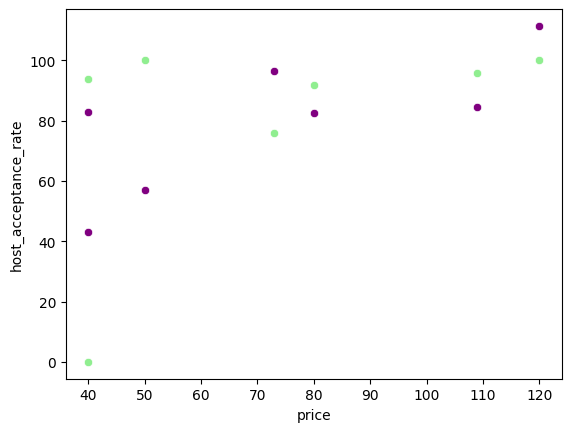

In [66]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [67]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [68]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.40917497780265144

In [69]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.6396678652258931

###**Price vs availability_365, host_response_rate, number_of_reviews, accommodates**

In [70]:
data = private

In [71]:
data['accommodates'] = data['accommodates'].astype(float)

<ipython-input-71-0c4d7e569382>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['accommodates'] = data['accommodates'].astype(float)


In [72]:
y = data[['price']]
x1 = data[['availability_365']]
x2 = data[['host_response_rate']]
x3 = data[['number_of_reviews']]
x4 = data[['accommodates']]

<Axes: xlabel='availability_365', ylabel='price'>

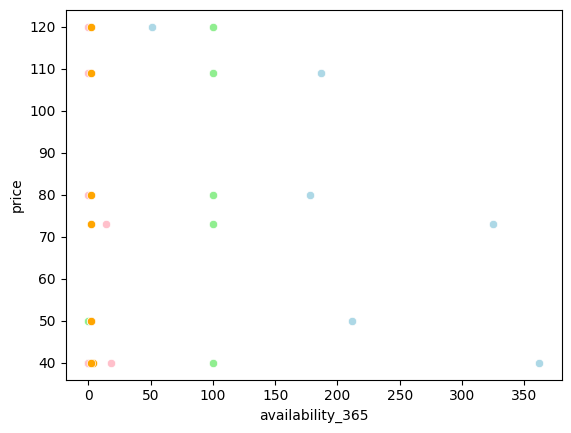

In [73]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [74]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [75]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [76]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [77]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [78]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[ -0.16773766,   0.39844823,  -0.90960894, -23.68980109]]),
 'rank_': 4,
 'singular_': array([327.08580424, 106.71709279,  10.41155057,   0.89192511]),
 'intercept_': array([134.75920436])}

####**Modelo matemático**

Modelo matemático: y= -0.16773766x1 +   0.39844823x2 +  -0.90960894x3 + -23.68980109x4 + 134.75920436

In [79]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[ 95.85748263],
       [ 40.        ],
       [ 59.97516019],
       [ 50.13043096],
       [ 50.        ],
       [118.66980464],
       [ 97.36712158]])

In [80]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-80-9a0fc1fe72ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,availability_365,host_response_rate,number_of_reviews,accommodates,price,Predicciones
356,187.0,100.0,0.0,2.0,109.0,95.857483
2484,0.0,0.0,0.0,4.0,40.0,40.000000
3134,325.0,100.0,14.0,2.0,73.0,59.975160
7838,362.0,100.0,18.0,2.0,40.0,50.130431
16665,212.0,0.0,2.0,2.0,50.0,50.000000
17057,51.0,100.0,0.0,2.0,120.0,118.669805
19022,178.0,100.0,0.0,2.0,80.0,97.367122


<Axes: xlabel='host_response_rate', ylabel='price'>

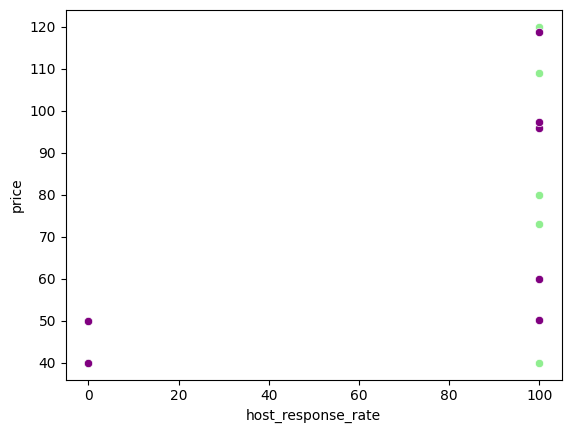

In [81]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [82]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [83]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.880466178815571

In [84]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.9383315932097623

###**host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication**

In [85]:
data = private

In [86]:
y = data[['host_acceptance_rate']]
x1 = data[['number_of_reviews']]
x2 = data[['review_scores_cleanliness']]
x3 = data[['review_scores_communication']]
x4 = '--'

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

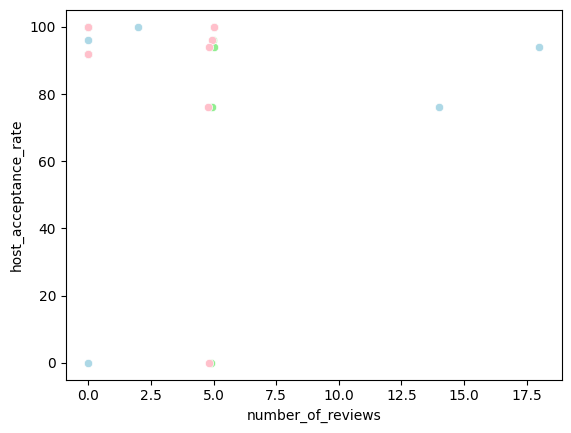

In [87]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)

In [88]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0]]]
Var_Dep= y

In [89]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [90]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [91]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [92]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([[   7.56382644, -762.66412995,  760.70352325]]),
 'rank_': 3,
 'singular_': array([19.32329786,  7.37908852,  0.03907423]),
 'intercept_': array([95.55565842])}

####**Modelo matemático**

Modelo matemático: y=  7.56382644x1 + -762.66412995x2 +  760.70352325x3 + 95.55565842

In [93]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0]]])
y_pred

array([[ 47.77626693],
       [ 47.95272153],
       [ 77.69751509],
       [ 92.58190185],
       [100.88027777],
       [ 95.55565842],
       [ 95.55565842]])

In [94]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],y.columns[0],'Predicciones']]


<ipython-input-94-d9a4cba03580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,review_scores_cleanliness,review_scores_communication,host_acceptance_rate,Predicciones
356,0.0,4.97,4.92,96.0,47.776267
2484,0.0,4.88,4.83,0.0,47.952722
3134,14.0,4.92,4.77,76.0,77.697515
7838,18.0,5.00,4.83,94.0,92.581902
16665,2.0,5.00,5.00,100.0,100.880278
17057,0.0,0.00,0.00,100.0,95.555658
19022,0.0,0.00,0.00,92.0,95.555658


<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

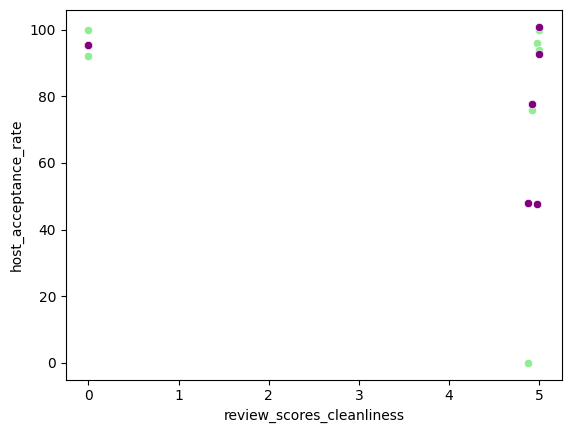

In [95]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [96]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4)

In [97]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.40304718673083595

In [98]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.6348599741130606

##**Tabla de Coeficientes**

In [99]:
tabla=pd.DataFrame()

In [100]:
tipo=['Entire home/apt','Entire home/apt','Entire home/apt','Private Room','Private Room','Private Room']

In [101]:
tabla['Tipo Habitación'] = tipo
tabla['X1'] = x1_e
tabla['X2'] = x2_e
tabla['X3'] = x3_e
tabla['X4'] = x4_e
tabla['Y'] = y_e  
tabla['Coef Determinación'] = deter_e
tabla['Coef Correlación'] = corr_e

In [102]:
tabla

,Tipo Habitación,X1,X2,X3,X4,Y,Coef Determinación,Coef Correlación
0,Entire home/apt,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,0.305087,0.552347
1,Entire home/apt,availability_365,host_response_rate,number_of_reviews,accommodates,price,0.007381,0.085911
2,Entire home/apt,number_of_reviews,review_scores_cleanliness,review_scores_communication,--,host_acceptance_rate,0.019998,0.141414
3,Private Room,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,0.409175,0.639668
4,Private Room,availability_365,host_response_rate,number_of_reviews,accommodates,price,0.880466,0.938332
5,Private Room,number_of_reviews,review_scores_cleanliness,review_scores_communication,--,host_acceptance_rate,0.403047,0.634860
